In [9]:
import numpy as np
import random
import math
import Function as funs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

'''优化函数'''


# # y = x^2, 用户可以自己定义其他函数
# def fun(X): # F2
#     Y = X[1:]
#     X = X[:-1]
#     O = np.sum(100 * (Y - X*X)**2 + (1-X)**2)
#     return O


''' 种群初始化函数 '''


def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random() * (ub[j] - lb[j]) + lb[j]

    return X, lb, ub


'''边界检查函数'''


def BorderCheck(X, ub, lb, pop, dim):
    for i in range(pop):
        for j in range(dim):
            if X[i, j] > ub[j]:
                X[i, j] = ub[j]
            elif X[i, j] < lb[j]:
                X[i, j] = lb[j]
    return X


'''计算适应度函数'''


def CaculateFitness(X, fun):
    pop = X.shape[0]
    fitness = np.zeros([pop, 1])
    for i in range(pop):
        fitness[i] = fun(X[i, :])
    return fitness


'''计算适应度函数-2'''


def CaculateFitness2(X,fun,C_c,C_rl):
    pop = X.shape[0]
    fitness = np.zeros([pop, 1])
    for i in range(pop):
        fitness[i] = fun(X[i, :],C_c,C_rl)
    return fitness


'''适应度排序'''


def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness, index


'''根据适应度对位置进行排序'''


def SortPosition(X, index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i, :] = X[index[i], :]
    return Xnew


In [10]:
'''鲸鱼优化算法'''

def WOA(pop, dim, lb, ub, Max_iter, fun, c, rl):
    X, lb, ub = initial(pop, dim, ub, lb)  # 初始化种群
    fitness = CaculateFitness2(X, fun, c, rl)  # 计算适应度值
    fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
    X = SortPosition(X, sortIndex)  # 种群排序
    GbestScore = fitness[0]
    GbestPositon = np.zeros([1,dim])
    GbestPositon[0,:] = X[0, :]
    Curve = np.zeros([MaxIter, 1])
    for t in range(MaxIter):
        Leader = X[0, :]  # 领头鲸鱼
        a = 2 * np.cos(t * math.pi /(2 * MaxIter))
        W = 2 * np.cos(t * math.pi /(2 * MaxIter))
        for i in range(pop):
            r1 = random.random()
            r2 = random.random()

            A = 2 * a * r1 - a
            C = 2 * r2
            b = 1
            l = (a - 1) * random.random() + 1

            for j in range(dim):

                p = random.random()
                if p < 0.5:
                    if np.abs(A) >= 1:
                        rand_leader_index = min(int(np.floor(pop * random.random() + 1)), pop - 1)
                        X_rand = X[rand_leader_index, :]
                        D_X_rand = np.abs(C * X_rand[j] - X[i, j])
                        X[i, j] = W * X_rand[j] - A * D_X_rand
                    elif np.abs(A) < 1:
                        D_Leader = np.abs(C * Leader[j] - X[i, j])
                        X[i, j] = W * Leader[j] - A * D_Leader
                elif p >= 0.5:
                    distance2Leader = np.abs(Leader[j] - X[i, j])
                    X[i, j] = W * distance2Leader * np.exp(b * l) * np.cos(l * 2 * math.pi) + Leader[j]
                

        X = BorderCheck(X, ub, lb, pop, dim)  # 边界检测
        fitness = CaculateFitness2(X, fun, c, rl)  # 计算适应度值
        fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
        X = SortPosition(X, sortIndex)  # 种群排序
        if fitness[0] <= GbestScore:  # 更新全局最优
            GbestScore = fitness[0]
            GbestPositon[0,:] = X[0, :]
        Curve[t] = GbestScore

    return GbestScore, GbestPositon, Curve

In [11]:
o = [0.2,0.5,0.5,0.3,0.6,
     0.7,0.8,0.9,0.8,0.6,
     0.3,0.5,0.5,0.4,0.2]
c = np.random.uniform(0.5, 1, size=(100,4))
c[:10]

array([[0.8823886 , 0.59639408, 0.92196374, 0.87318201],
       [0.73860717, 0.97232869, 0.64702835, 0.84807461],
       [0.6242009 , 0.80544821, 0.58350732, 0.64032434],
       [0.99443405, 0.9545435 , 0.8988845 , 0.7894955 ],
       [0.87916995, 0.84020181, 0.89166461, 0.51615426],
       [0.62185635, 0.57733029, 0.85319992, 0.95652554],
       [0.53466895, 0.51618789, 0.80579362, 0.60709275],
       [0.94704415, 0.86282008, 0.69447341, 0.87413365],
       [0.6830063 , 0.63221256, 0.86014025, 0.81808371],
       [0.94541162, 0.73937031, 0.75081246, 0.7798229 ]])

In [12]:
rl = []
for it in c:
    f = funs.FPN(o,it)
    rl.append(f)
rl = np.array(rl)
rl[:10]

array([0.82368846, 0.86854061, 0.70981758, 0.94836901, 0.79365462,
       0.75836608, 0.60219465, 0.90608425, 0.75383099, 0.84246056])

In [13]:
'''主函数 '''
# 设置参数
pop = 50  # 种群数量
MaxIter = 1000  # 最大迭代次数
dim = 15  # 维度
lb = 0 * np.ones([dim, 1])  # 下边界
ub = 1 * np.ones([dim, 1])  # 上边界

o = [0.2,0.3,0.5,0.3,0.6, # 最佳参数期望
     0.7,0.5,0.9,0.7,0.6,
     0.3,0.5,0.7,0.4,0.2]
c = np.random.uniform(0.5, 1, size=(100,4)) # 随机输入值

rl = []
for it in c:
    f = funs.FPN(o,it)
    rl.append(f)
rl = np.array(rl) # 输出值

fun = funs.FNs

In [14]:
GbestScore, GbestPositon, Curve = WOA(pop, dim, lb, ub, MaxIter, fun ,c,rl)
print('最优适应度值：', GbestScore)
print('最优解：', GbestPositon)

最优适应度值： [0.66286244]
最优解： [[0.05848412 0.75717313 0.95122658 0.01552023 0.81439148 0.72601864
  0.87023379 0.93528618 0.25658676 0.65377539 0.44035016 0.64838425
  0.24725474 0.76761197 0.15767783]]


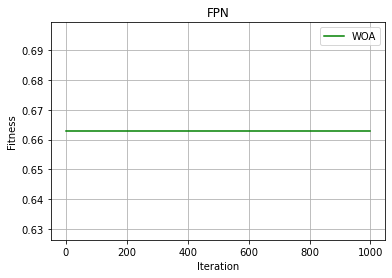

In [16]:
# 绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'g-',label='WOA')
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('FPN',fontsize='large')
plt.legend()
plt.show()


In [ ]:
# # 绘制搜索空间
# fig = plt.figure(2)
# ax = Axes3D(fig)
# X = np.arange(-4, 4, 0.25)
# Y = np.arange(-4, 4, 0.25)
# X, Y = np.meshgrid(X, Y)
# Z = X ** 2 + Y ** 2
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
# plt.show()